In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# open up the swes

In [5]:
dslr = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swedata/og_grid/ASO_250M_SWE_bilin_20190407_latlon.nc")
dslr = dslr.where(dslr.Band1 > 0.)

In [ ]:
dshr = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swedata/og_grid/ASO_50M_SWE_20190407_latlon.nc")
dshr = dshr.where(dshr.Band1 > 0.)

In [ ]:
# open up the depths

In [6]:
dshr_dep = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/snowdepths//og_grid/ASO_SD_20190407_latlon.nc")
dshr_dep = dshr_dep.where(dshr_dep.Band1 > 0.)

dslr_dep = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/snowdepths/og_grid/ASO_SD_250m_bilin_20190407_latlon.nc")
dslr_dep = dslr_dep.where(dslr_dep.Band1 > 0.)

In [7]:
dem = xr.open_dataset("/scratch/wrudisill/EastLSM_Only/most_recent_aso_data/swedata/og_grid/3mdem_upsample_50m_East_latlon.nc")
dem = dem.where(dem.Band1>0)
#dem.Band1.plot(

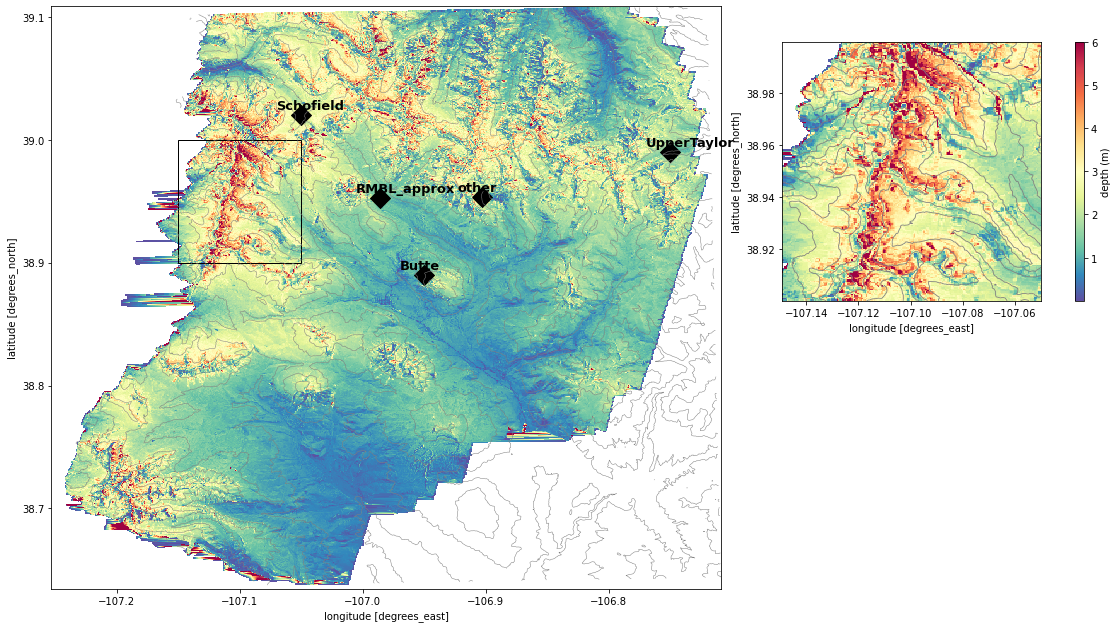

In [42]:
fig,ax = plt.subplots()
fig.set_size_inches(12,18)
dshr_dep.Band1.plot(vmin=0, vmax=6, ax=ax, cmap='Spectral_r',  add_colorbar=False)
ax.set_xlim(-107.2, -106.74)
ax.set_ylim(38.77, 39.025)

# left, bottom, width, height
ax2 = fig.add_axes([.97, .45, .3, .3])
ax3 = fig.add_axes([1.31, .5, .01, .2])

#ax3 = fig.add_axes([.97, .25, .3, .3])

# plot the snotel sites...

lats = [38.89,    39.02,   38.99,   38.95231, 38.9535]
lons = [-106.95, -107.05, -106.75, -106.9856, -106.903]

38.9535 
#38.95231455292583, -106.98556315540024
names = ["Butte", "Schofield", "UpperTaylor", "RMBL_approx", "other"]

i=0
for la,lo, in zip(lats,lons):
    ax.scatter(lo, la, marker='D', s=200, color='black')
    ax.text(lo-.02, la+.005,  names[i], size=13, weight='bold')
    i+=1
    
clabs = ax.contour(dem.lon, dem.lat, dem.Band1.values, colors='gray', linewidths=.5)
#plt.clabel(clabs)

# lat=slice(38.9,39.0), lon=slice(-107.15, -107.095)
# rect = patches.Rectangle((38.9,39.0), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

import matplotlib.patches as patches
rect = patches.Rectangle((-107.15, 38.9), .1, .1, fill=False) #transform=ax.get_transform())


cb = dshr_dep.sel(lat=slice(38.9, 39.0), lon=slice(-107.15, -107.15 + .1)).Band1.plot(vmax=6, cmap='Spectral_r', ax=ax2, add_colorbar=False)


cbact = fig.colorbar(cb, cax=ax3, orientation="vertical")
cbact.set_label("depth (m)")
dslr_dep.sel(lat=slice(38.9, 39.0), lon=slice(-107.15, -107.15 + .1)).Band1.plot(vmax=6, cmap='Spectral_r', ax=ax3, add_colorbar=False)

dem_smaller_region = dem.sel(lat=slice(38.9, 39.0), 
                             lon=slice(-107.15, -107.15 + .1))
                             
ax2.contour(dem_smaller_region.lon, 
            dem_smaller_region.lat, 
            dem_smaller_region.Band1.values, colors='gray', linewidths=.8)

# ax3.contour(dem_smaller_region.lon, 
#             dem_smaller_region.lat, 
#             dem_smaller_region.Band1.values, colors='gray', linewidths=.8)

for axx in [ax,ax2]:
    axx.axis('scaled')

# Add the patch to the Axes
ax.add_patch(rect)

#ax.quiver(mp08_2019.XLONG, mp08_2019.XLAT,mp08_2019.U10.mean(dim="XTIME"), mp08_2019.V10.mean(dim="XTIME"), color='gray')

#ax2.quiver(mp08_2019.XLONG, mp08_2019.XLAT, mp08_2019.U10.mean(dim="XTIME"), mp08_2019.V10.mean(dim="XTIME"), scale=100, width=.01)
#ax3.quiver(mp08_2019.XLONG, mp08_2019.XLAT, mp08_2019.U10.mean(dim="XTIME"), mp08_2019.V10.mean(dim="XTIME"), scale=100, width=.01)


In [ ]:
# open up the aspect layer...

In [45]:
slope = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/ASOdata/processed_dems/wgs84_latlon_slope_50m.nc")

In [50]:
# fig,ax = plt.subplots()
# fig.set_size_inches(12,12)
#slope.Band1.plot(vmin=0, vmax=90, ax=ax)

dep_array = dshr_dep.where((dshr_dep.Band1>0)&(dshr_dep.Band1<30)).Band1.values
slp_array = slope.where(slope.Band1 < 20).Band1.values

# get the snowdepths on low slopes 
#    np.where(slp_array<20, dep_array, np.nan)

In [60]:
new_array = np.zeros_like(dep_array)
xl = dep_array.shape[0]
yl = dep_array.shape[0]
search_len = 4 #

for i in range(xl):
    for j in range(yl):
        
        

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


KeyboardInterrupt: 

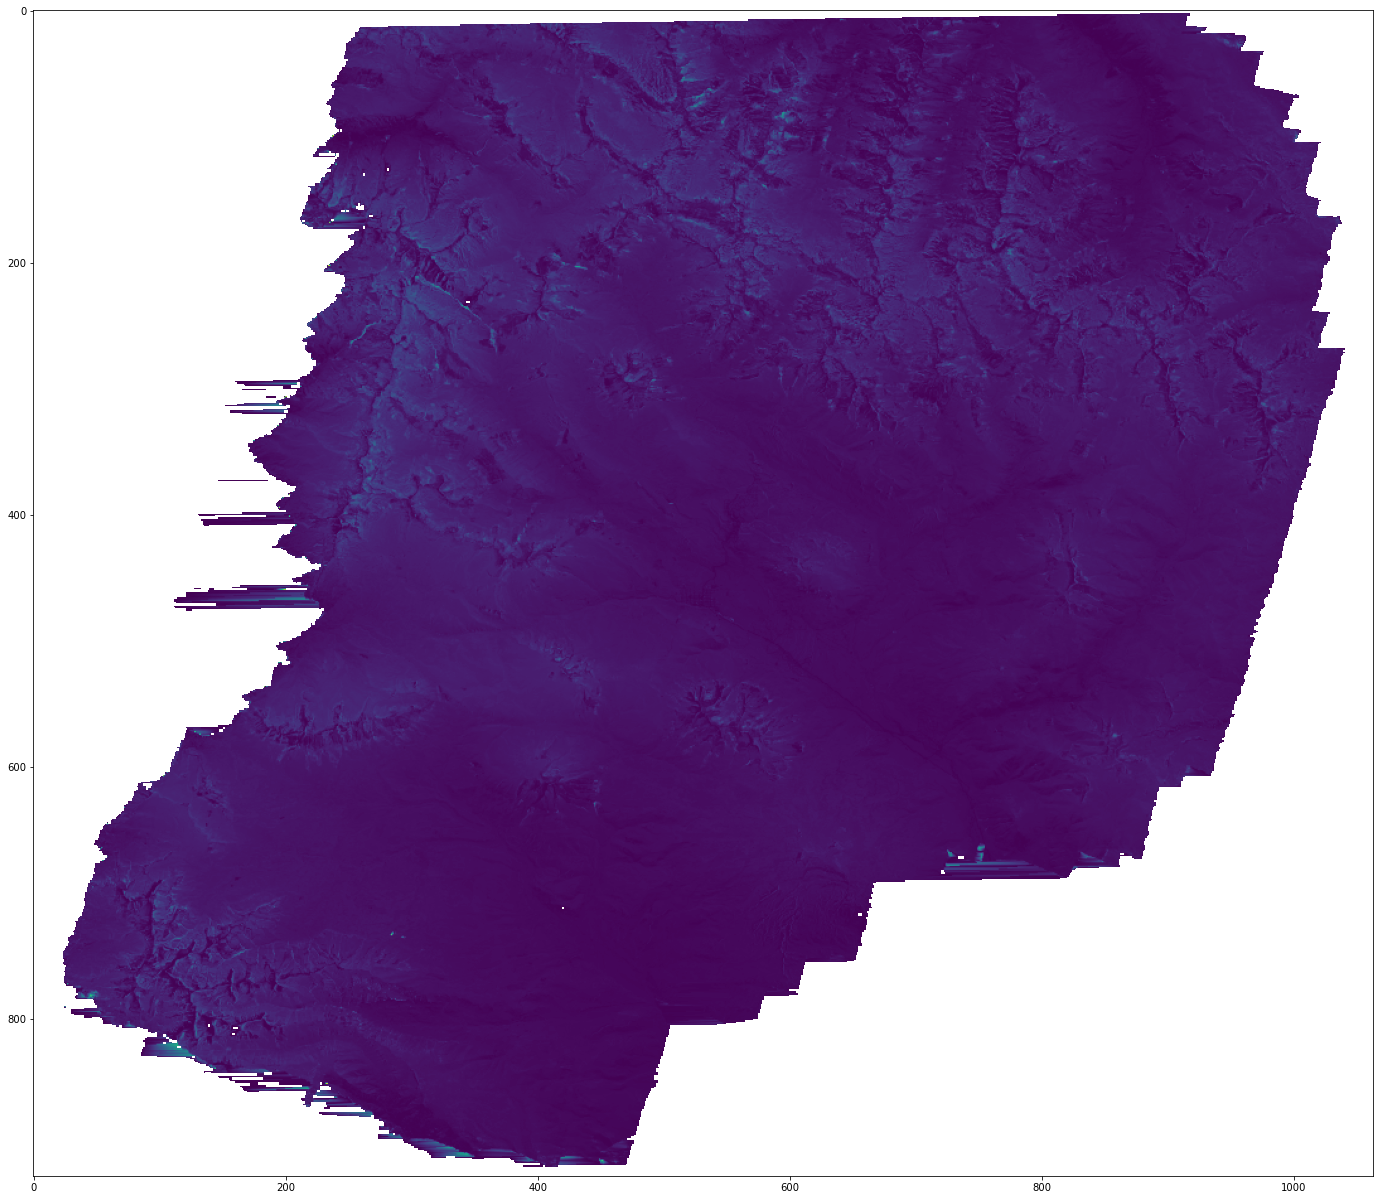

In [56]:
fig,ax=plt.subplots()
fig.set_size_inches(24,24)

ax.imshow(dep_array[::-1,:])#vmax=20)

/home/wrudisill/miniconda3/envs/wrfplotenv/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/wrudisill/miniconda3/envs/wrfplotenv/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(0.0, 6.0)

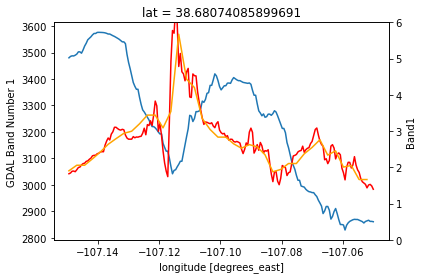

In [200]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
dem.Band1.sel(lon=slice(-107.15, -107.15 + .1)).isel(lat=90).plot(ax=ax)
dshr_dep.Band1.sel(lat=slice(38.93, 38.935)).mean(dim="lat").sel(lon=slice(-107.15, -107.15 + .1)).plot(ax=ax2, color='red')
dslr_dep.Band1.sel(lat=slice(38.93, 38.935)).mean(dim="lat").sel(lon=slice(-107.15, -107.15 + .1)).plot(ax=ax2, color='orange')
ax2.set_ylim(0,6)

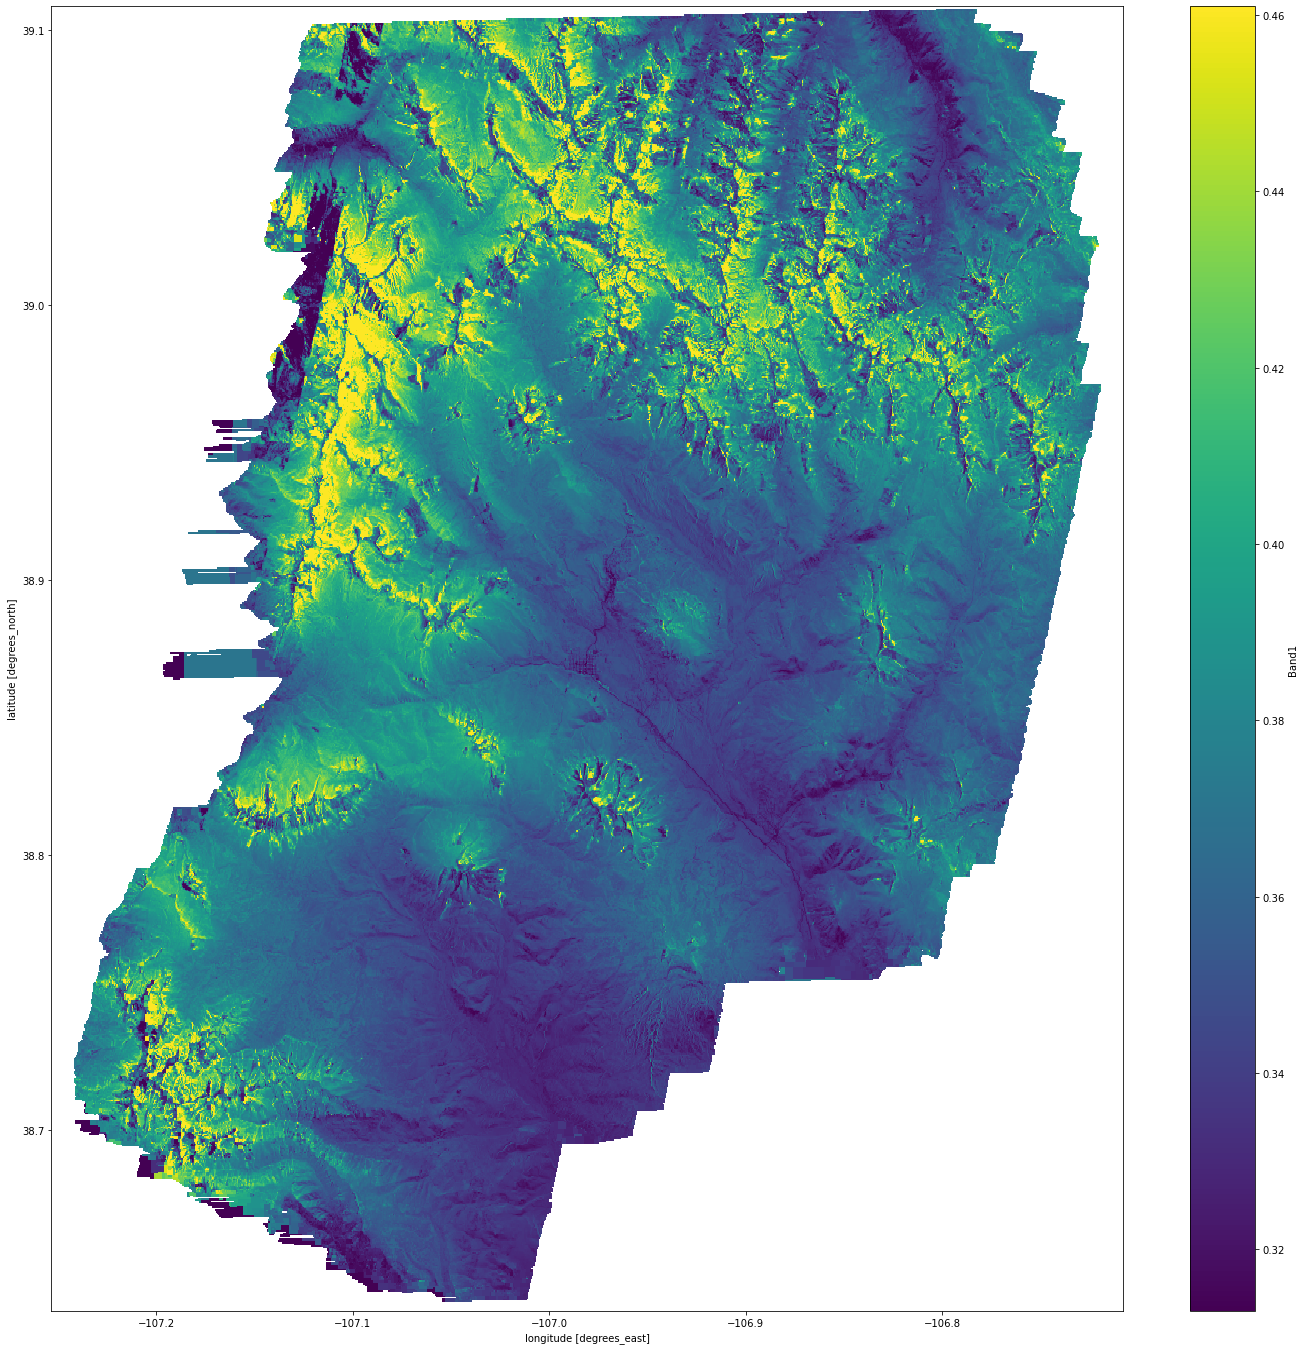

In [70]:
fig,ax = plt.subplots()
fig.set_size_inches(24,24)
(dshr.Band1/dshr_dep.Band1).plot()

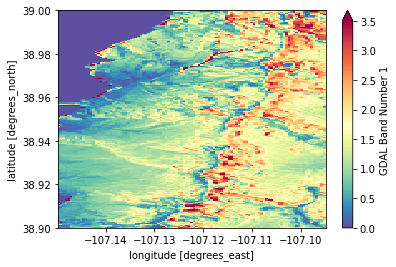

In [44]:
dshr.sel(lat=slice(38.9,39.0), lon=slice(-107.15, -107.095)).Band1.plot(vmax=3.5, cmap='Spectral_r')



In [136]:
dslr.sel(lat=slice(38.9,39.0), lon=slice(-107.15, -107.095)).Band1.plot(vmax=3.5, cmap='Spectral_r')

IndexError: index -1 is out of bounds for axis 0 with size 0